In [112]:
import pandas as pd
from datetime import datetime
import plotly.express as px

In [113]:
gps_nucleo = pd.read_csv("C:/dashboard_onibus/dados/dados_gps.csv", sep=";")
faixas = pd.read_csv("C:/dashboard_onibus/dados/faixas_horarias.csv", sep=";")
linhas = pd.read_csv("C:/dashboard_onibus/dados/linhas_e_nucleos.csv", sep=";")
programacao = pd.read_csv("C://dashboard_onibus/dados/programacao_partidas.csv", sep=";")

In [114]:
del gps_nucleo['Linha Informada a SMTR']
del gps_nucleo['Linha Realizada pela SMTR']
del gps_nucleo['Veículo Consolidado pela SMTR']
del gps_nucleo ['Início da Viagem pela SMTR']
del gps_nucleo ['Término da Viagem pela SMTR']
del gps_nucleo ['Viagem Reconhecida']

In [115]:
gps_nucleo = pd.merge(gps_nucleo, linhas, on="Linha", how="left")

In [116]:
del gps_nucleo ['Tipo Linha']
del gps_nucleo ['Nome_Linha']

In [117]:
gps_nucleo['Início da Viagem'] = pd.to_datetime(gps_nucleo['Início da Viagem'], dayfirst=True)
gps_nucleo['Término da Viagem'] = pd.to_datetime(gps_nucleo['Término da Viagem'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [118]:
gps_nucleo['hora_viagem'] = gps_nucleo['Início da Viagem'].dt.time

In [119]:
gps_nucleo['_key'] = 1
faixas['_key'] = 1

In [120]:
merged = pd.merge(gps_nucleo, faixas, on='_key')

In [121]:
merged['hora_inicio'] = pd.to_datetime(merged['hora_inicio'], format='%H:%M:%S').dt.time
merged['hora_fim'] = pd.to_datetime(merged['hora_fim'], format='%H:%M:%S').dt.time

In [122]:
resultado = merged[(merged['hora_viagem'] >= merged['hora_inicio']) & (merged['hora_viagem'] <= merged['hora_fim'])]

In [123]:
resultado = resultado[['Início da Viagem', 'Faixa_Horaria']]

In [124]:
gps_nucleo = gps_nucleo.merge(resultado, on='Início da Viagem', how='left')

In [125]:
gps_nucleo = gps_nucleo.drop_duplicates()

In [126]:
partidas_executadas = gps_nucleo.groupby(['Linha', 'Faixa_Horaria']).size().reset_index(name='Total_Partidas')

In [127]:
partidas_executadas = partidas_executadas.sort_values(by=['Linha', 'Faixa_Horaria'])

In [128]:
programacao

,Linha,Viagens Programadas,Tipo Linha,Tipo Dia,Tipo de Programação,Faixa
0,Linha,Viagens Programadas,Tipo Linha,Tipo Dia,Tipo de Programação,00-03
1,100,0,Linha,Dia Útil,100% SMTR,00-03
2,105,0,Linha,Dia Útil,100% SMTR,00-03
3,108,0,Linha,Dia Útil,100% SMTR,00-03
4,110,0,Linha,Dia Útil,100% SMTR,00-03
...,...,...,...,...,...,...
220,SN538,5,Linha,Dia Útil,100% SMTR,21-00
221,SP309,0,Serviço,Dia Útil,100% SMTR,21-00
222,SP315,0,Serviço,Dia Útil,100% SMTR,21-00
223,SP553,0,Serviço,Dia Útil,100% SMTR,21-00


In [129]:
programacao.columns = programacao.columns.str.strip()
partidas_executadas.columns = partidas_executadas.columns.str.strip()

In [130]:
partidas_executadas = partidas_executadas.rename(columns={'Total_Partidas': 'Executado'})

In [131]:
programacao = programacao.rename(columns={'Faixa': 'Faixa_Horaria', 'linha': 'Linha'})

In [132]:
comparativo = pd.merge(
    partidas_executadas,
    programacao.rename(columns={'Viagens Programadas': 'Programado'}),
    how='left',
    on=['Linha', 'Faixa_Horaria']
)


In [133]:
comparativo

,Linha,Faixa_Horaria,Executado,Programado,Tipo Linha,Tipo Dia,Tipo de Programação
0,108,03-06,12,15,Linha,Dia Útil,100% SMTR
1,108,06-09,36,42,Linha,Dia Útil,100% SMTR
2,108,09-12,32,37,Linha,Dia Útil,100% SMTR
3,108,12-15,27,32,Linha,Dia Útil,100% SMTR
4,110,03-06,15,16,Linha,Dia Útil,100% SMTR
5,110,06-09,43,52,Linha,Dia Útil,100% SMTR
6,110,09-12,34,35,Linha,Dia Útil,100% SMTR
7,110,12-15,30,35,Linha,Dia Útil,100% SMTR
8,112,03-06,15,16,Linha,Dia Útil,100% SMTR
9,112,06-09,35,60,Linha,Dia Útil,100% SMTR


In [134]:
comparativo['Programado'] = (
    comparativo['Programado']
    .str.replace(',', '.', regex=False)                # Troca vírgula por ponto
    .astype(float)                                      # Converte para float
    .fillna(0)
    .astype(int)                                        # Depois para int
)

In [135]:
#comparativo['Programado'] = comparativo['Programado'].fillna(0).astype(int)

In [136]:
comparativo['% Execução'] = (comparativo['Executado'] / comparativo['Programado'].replace(0, 1)) * 100
comparativo['% Execução'] = comparativo['% Execução'].round(1)

In [137]:
comparativo.loc[comparativo['Programado'] == 0, '% Execução'] = 0

In [138]:
del comparativo ['Tipo Linha']

In [139]:
saida = "comparativo_programado_executado_com_nucleo.csv"

In [140]:
df_merged = pd.merge(
    comparativo,
    linhas[['Linha', 'Núcleo']],  # Mantém só a coluna necessária do núcleo
    on='Linha',
    how='left'  # Faz um left join para manter todas as linhas do comparativo
)

In [141]:
#df_merged['% Execução'] = df_merged['% Execução'] / 100

In [142]:
#df_merged['% Execução'] = df_merged['% Execução'].apply(lambda x: f"{x:.1%}")

In [143]:
df_merged

,Linha,Faixa_Horaria,Executado,Programado,Tipo Dia,Tipo de Programação,% Execução,Núcleo
0,108,03-06,12,15,Dia Útil,100% SMTR,80.0,Gentileza
1,108,06-09,36,42,Dia Útil,100% SMTR,85.7,Gentileza
2,108,09-12,32,37,Dia Útil,100% SMTR,86.5,Gentileza
3,108,12-15,27,32,Dia Útil,100% SMTR,84.4,Gentileza
4,110,03-06,15,16,Dia Útil,100% SMTR,93.8,Gentileza
5,110,06-09,43,52,Dia Útil,100% SMTR,82.7,Gentileza
6,110,09-12,34,35,Dia Útil,100% SMTR,97.1,Gentileza
7,110,12-15,30,35,Dia Útil,100% SMTR,85.7,Gentileza
8,112,03-06,15,16,Dia Útil,100% SMTR,93.8,Gentileza
9,112,06-09,35,60,Dia Útil,100% SMTR,58.3,Gentileza


In [144]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Linha                54 non-null     object 
 1   Faixa_Horaria        54 non-null     object 
 2   Executado            54 non-null     int64  
 3   Programado           54 non-null     int64  
 4   Tipo Dia             54 non-null     object 
 5   Tipo de Programação  54 non-null     object 
 6   % Execução           54 non-null     float64
 7   Núcleo               54 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.5+ KB


In [145]:
faixa_grafico = df_merged.loc[df_merged['Faixa_Horaria'] == '06-09']

In [146]:
faixa_grafico

,Linha,Faixa_Horaria,Executado,Programado,Tipo Dia,Tipo de Programação,% Execução,Núcleo
1,108,06-09,36,42,Dia Útil,100% SMTR,85.7,Gentileza
5,110,06-09,43,52,Dia Útil,100% SMTR,82.7,Gentileza
9,112,06-09,35,60,Dia Útil,100% SMTR,58.3,Gentileza
13,163,06-09,21,32,Dia Útil,100% SMTR,65.6,Gentileza
17,222,06-09,4,5,Dia Útil,100% SMTR,80.0,Gentileza
21,309,06-09,62,72,Dia Útil,100% SMTR,86.1,Central
25,315,06-09,30,48,Dia Útil,100% SMTR,62.5,Central
30,460,06-09,82,94,Dia Útil,100% SMTR,87.2,São Cristóvão
34,463,06-09,43,60,Dia Útil,100% SMTR,71.7,São Cristóvão
38,538,06-09,15,24,Dia Útil,100% SMTR,62.5,Central


In [147]:
faixa_grafico = faixa_grafico.sort_values(by='% Execução', ascending=False)

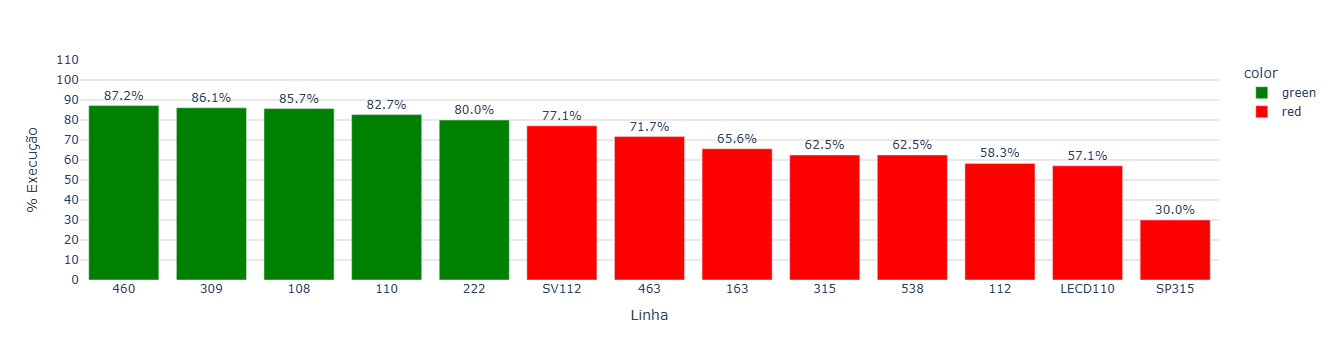

In [148]:
# Criar coluna de texto formatada
faixa_grafico['text_percent'] = faixa_grafico['% Execução'].round(1).astype(str) + '%'

# Criar coluna de cor
faixa_grafico['color'] = faixa_grafico['% Execução'].apply(lambda x: 'green' if x >= 80 else 'red')

# Criar o gráfico
fig = px.bar(
    faixa_grafico,
    x='Linha',
    y='% Execução',
    text='text_percent',
    color='color',
    color_discrete_map={
        'green': 'green',
        'red': 'red'
    }
)

# Personalizar o eixo Y
fig.update_yaxes(
    dtick=10,
    range=[0, 110],
    title_text='% Execução'
)

# Melhorar aparência do texto nas barras
fig.update_traces(
    textposition='outside'
)

# Remover o fundo do gráfico
fig.update_layout(
    plot_bgcolor='white',      # Fundo da área do gráfico
    paper_bgcolor='white',     # Fundo total da imagem
    xaxis=dict(showgrid=False),  # Tirar linhas de grade no eixo X
    yaxis=dict(gridcolor='lightgrey')  # (Opcional) Manter grade Y em cinza claro
)

fig.show()

